# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y) ,1)

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [30]:
print(X)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [31]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


## Training the SVR model on the whole dataset

In [36]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [41]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
print(y_pred)

[[170370.02]]


## Visualising the SVR results

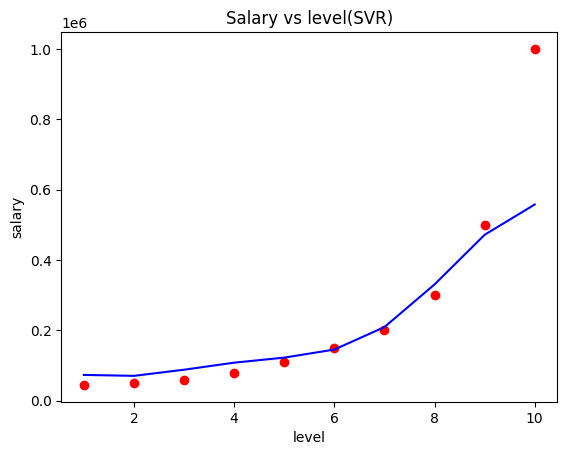

In [48]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title("Salary vs level(SVR)")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-52-08a844d19feb>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1 )


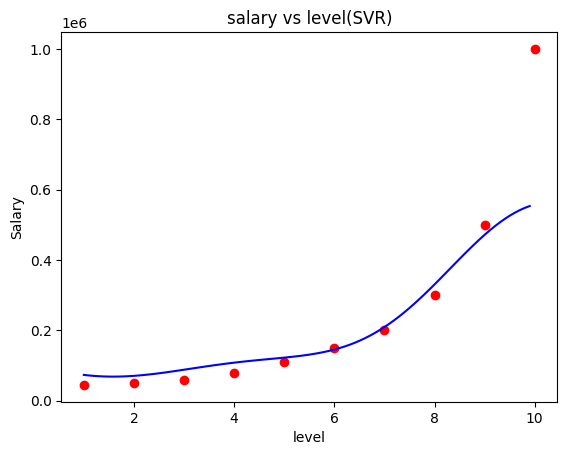

In [52]:
x_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1 )
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title("salary vs level(SVR)")
plt.xlabel("level")
plt.ylabel('Salary')
plt.show()